In [16]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


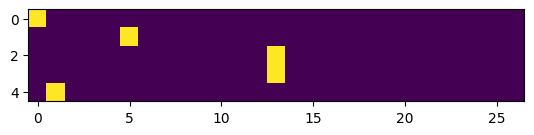

In [17]:
# create the training set of bigrams
def get_bigrams_training_set():
    xs, ys = [], []
    words = open("names.txt", "r").read().splitlines()
    chars = sorted(list(set("".join(words))))
    stoi = {s: i+1 for i,s in enumerate(chars)}
    stoi["."] = 0
    itos = {i: s for s,i in stoi.items()}
    for word in words[1:]:
        chs = ['.'] + list(word) + ['.']
        for ch1, ch2 in zip(chs, chs[1:]):        
            idx1 = stoi[ch1]
            idx2 = stoi[ch2]
            xs.append(idx1)
            ys.append(idx2)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)

    return xs, ys

xs, ys = [], []
words = open("names.txt", "r").read().splitlines()
chars = sorted(list(set("".join(words))))
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s,i in stoi.items()}
for word in words[:1]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):        
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        xs.append(idx1)
        ys.append(idx2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs)
print(ys)
xenc = F.one_hot(xs, num_classes=27).float()
plt.imshow(xenc)

In [20]:
# creating a neural network

# create a weight column vector 27x1 for a single neuron
W = torch.randn((27, 1))
print(f"{W=}")
value = xenc @ W # (5, 27) @ (27, 1) => (5, 1)
print(f"{value=}")

W=tensor([[ 0.3789],
        [ 0.1689],
        [-1.5193],
        [ 1.7741],
        [ 0.4802],
        [-0.5123],
        [ 1.8850],
        [-2.4840],
        [ 0.5489],
        [-0.7584],
        [-0.5671],
        [-0.4116],
        [-1.5375],
        [-1.1800],
        [ 0.6047],
        [-0.3427],
        [ 1.7951],
        [ 1.6558],
        [-0.0709],
        [ 1.7074],
        [ 0.9136],
        [ 0.2981],
        [-1.1702],
        [ 0.9223],
        [ 1.3137],
        [-0.2062],
        [-0.9943]])
value=tensor([[ 0.3789],
        [-0.5123],
        [-1.1800],
        [-1.1800],
        [ 0.1689]])


In [17]:
# create weights for 27 neurons
# Randomly initilaize 27 neurons weights. Each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)
xenc @ W # (5, 27) @ (27, 27) => (5, 27)

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9644e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2844e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4040e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0731e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2198e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [18]:
# Every element in xenc @ W telling us, for every one of 27 neurons that we created 
# what is the firing rate of those neurons on every one of those five examples
# the elment [3, 13] gives us the firing rate of 13th neuron looking at 3rd input

(xenc @ W)[3, 13]

# The firing rate of [3, 13] is acheived by the dot product of 3rd input and the
# 13th column of the w matrix which is weights of the 13th neuron.

tensor(0.0379)

In [20]:
# The result of xenc @ W is a log count and to convert log counts to count we use exponent function
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = (xenc @ W) # predict log-counts
counts = logits.exp() # This equivalent to N matrix in statistical bigram model
probs = counts / counts.sum(1, keepdim=True) # probabilites for next charcter
# the last 2 lines here are together called a 'softmax'
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [22]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print("----------------------")
    print(f"bigram example {i+1}: {itos[x]}{itos[y]} (indices {x}, {y})")
    print("input to the neural net:", x)
    print("output probabilites from the neural net:", probs[i])
    print("label (actual next character):", y)
    p = probs[i, y]
    print("probability assigned by the net to the correct character:", p.item())
    logp = torch.log(p)
    print("log likelihood:", logp.item())
    nll = -logp
    print("negative log likelihood:", nll.item())
    nlls[i] = nll

print("=======================")
print("average negative log likelihood, i.e loss=", nlls.mean().item())

----------------------
bigram example 1: .e (indices 0, 5)
input to the neural net: 0
output probabilites from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
----------------------
bigram example 2: em (indices 5, 13)
input to the neural net: 5
output probabilites from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to th

In [24]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = (xenc @ W) # predict log-counts
counts = logits.exp() # This equivalent to N matrix in statistical bigram model
probs = counts / counts.sum(1, keepdim=True) # probabilites for next charcter
# the last 2 lines here are together called a 'softmax'
probs[torch.arange(5), ys] # print probabilites assigned by the nn for the next character

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150])

In [25]:
loss = -probs[torch.arange(5), ys].log().mean() # (negative log likelihood)
loss

tensor(3.7693)

In [30]:
# Randomly initilaize 27 neurons weights. Each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [35]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = (xenc @ W) # predict log-counts
counts = logits.exp() # This equivalent to N matrix in statistical bigram model
probs = counts / counts.sum(1, keepdim=True) # probabilites for next charcter
# the last 2 lines here are together called a 'softmax'
probs[torch.arange(5), ys] # print probabilites assigned by the nn for the next character
loss = -probs[torch.arange(5), ys].log().mean() # (negative log likelihood)

In [36]:
print(loss.item())

3.7492129802703857


In [33]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()


In [34]:
W.data += -0.1 * W.grad

In [ ]:
# Putting everything togeter

In [12]:
xs, ys = [], []
words = open("names.txt", "r").read().splitlines()
chars = sorted(list(set("".join(words))))
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s,i in stoi.items()}

# Create the dataset
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("number of examples:", num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples: 228146


In [13]:
# gradient descent
for k in range(200):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network, one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivlanet to N
    probs = counts / counts.sum(1, keepdims=True)
    # # (negative log likelihood) using probabilites assigned by the nn for the next character
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad


3.758953809738159
3.371100902557373
3.154043197631836
3.020373821258545
2.927711248397827
2.8604023456573486
2.8097290992736816
2.7701022624969482
2.7380728721618652
2.711496591567993
2.6890032291412354
2.6696882247924805
2.6529300212860107
2.638277292251587
2.6253879070281982
2.6139907836914062
2.60386323928833
2.5948219299316406
2.5867116451263428
2.5794036388397217
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562586784362793
2.551633596420288
2.547365665435791
2.543415069580078
2.5397486686706543
2.5363364219665527
2.533154249191284
2.5301806926727295
2.5273966789245605
2.5247862339019775
2.522334575653076
2.520029067993164
2.517857789993286
2.515810489654541
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056614875793457
2.504261016845703
2.5029289722442627
2.5016608238220215
2.5004522800445557
2.4992988109588623
2.498197317123413
2.497144937515259
2.4961376190185547
2.495173692703247
2.4942493438720703
2.493363380432129


In [14]:
# generates names from NN weights
def generate_names_from_weights(W):
    idx = 0 # "." 
    name = []
    while True:
        xenc = F.one_hot(torch.tensor([idx]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name.append(itos[idx])
        # check for end token
        if idx == 0:
            break
    print("".join(name))

g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    generate_names_from_weights(W)

junide.
janasah.
prelay.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
